In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
ath = pd.read_csv("new_athlete.csv").dropna()
ath.head()

Unnamed: 0                      Name Sex   Age  Height  Weight
0           0                 A Dijiang   M  24.0   180.0    80.0
1           1                  A Lamusi   M  23.0   170.0    60.0
4           4  Christine Jacoba Aaftink   F  21.0   185.0    82.0
5          10           Per Knut Aaland   M  31.0   188.0    75.0
6          18              John Aalberg   M  31.0   183.0    72.0

[1.01872662]
-106.47474879311024


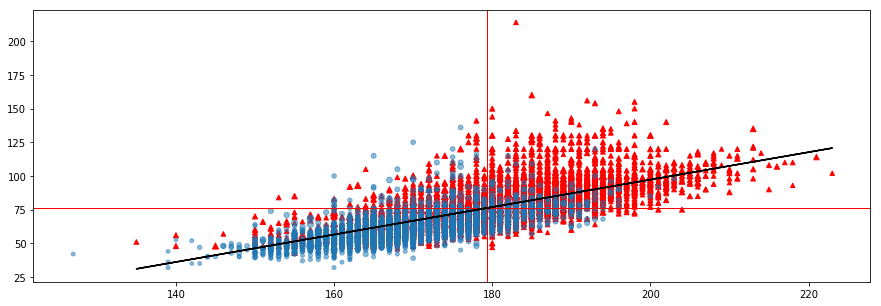

In [60]:
male_ath = ath[ath['Sex'] == 'M']
male_h = male_ath['Height']
male_w = male_ath['Weight']
plt.figure(figsize=(15, 5))

# 求男性身高体重的平均值
male_h_mean = male_h.mean()
male_w_mean = male_w.mean()

# 散点图基本绘制
plt.scatter(male_h, male_w, c='r', s=male_ath['Age'], marker='^')

# 绘制男性身高, 体重平均线
plt.axvline(male_h_mean, linewidth=1, c='r')
plt.axhline(male_w_mean, linewidth=1, c='r')

# 女性同理
female_ath = ath[ath['Sex'] == 'F']
female_h = female_ath['Height']
female_w = female_ath['Weight']

# 求女性身高体重的平均值
female_h_mean = female_h.mean()
female_w_mean = female_w.mean()

# 散点图基本绘制
plt.scatter(female_h, female_w, s=female_ath['Age'], alpha=0.5)

# 绘制女性身高, 体重平均线
# plt.axvline(female_h_mean, linewidth=2, c='k')
# plt.axhline(female_w_mean, linewidth=2, c='c')

# 绘制线性回归线
from sklearn.linear_model import LinearRegression

# 生成线性回归对象
model = LinearRegression()
# 喂训练数据进去，但是需要把因变量转换成1列多行的数据
model.fit(male_h.values[:, np.newaxis], male_w)

# male_h.values.reshape(male_h.shape[0], 1)
# male_w.values[:, None]
# 打印斜率
print(model.coef_)
# 打印截距
print(model.intercept_)

# 根据回归方程计算出的y轴坐标
predict_male_w = model.predict(male_h.values[:, np.newaxis])
# 画出来
plt.plot(male_h.values[:, np.newaxis], predict_male_w, c='k')